In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

HouseDF=pd.read_csv('/content/Housedata.csv')
HouseDF.head()

,S.No,Square Footage,Area,Number of Bedrooms,Price
0,1.0,1500,Downtown,3,"4,50,000"
1,2.0,2000,Suburb,4,"6,00,000"
2,3.0,1800,Suburb,3,"5,00,000"
3,4.0,2200,Downtown,4,"7,50,000"
4,5.0,1700,Rural,3,"3,50,000"


In [ ]:
HouseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.No                48 non-null     float64
 1   Square Footage      49 non-null     int64  
 2   Area                49 non-null     object 
 3   Number of Bedrooms  49 non-null     int64  
 4   Price               49 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ KB


In [ ]:
HouseDF.describe()


,S.No,Square Footage,Number of Bedrooms
count,48.00,49.000000,49.000000
mean,24.50,1944.897959,3.367347
std,14.00,287.091176,0.928571
min,1.00,1400.000000,2.000000
25%,12.75,1750.000000,3.000000
50%,24.50,1950.000000,3.000000
75%,36.25,2150.000000,4.000000
max,48.00,2500.000000,5.000000


In [ ]:
HouseDF.columns

Index(['S.No', 'Square Footage', 'Area', 'Number of Bedrooms', 'Price'], dtype='object')

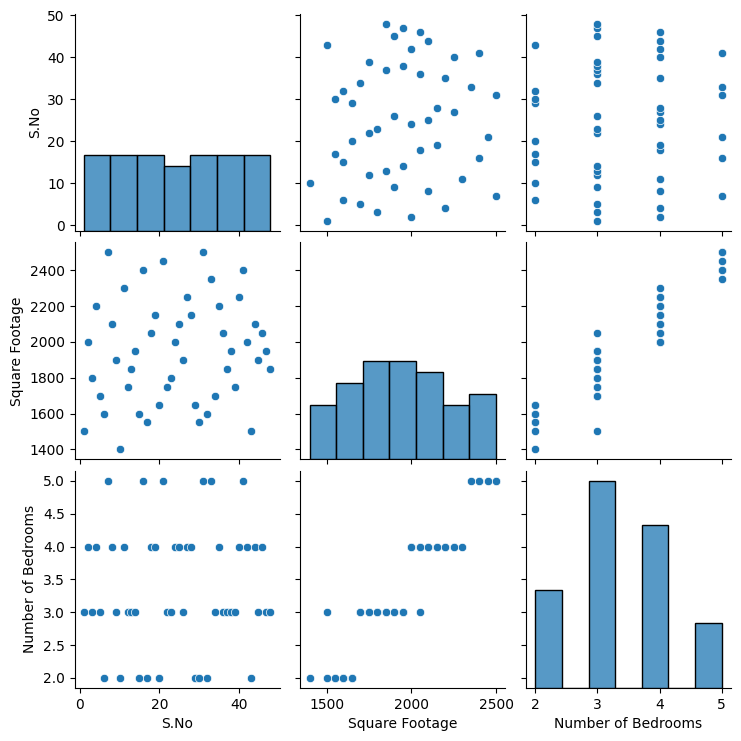

In [ ]:
sns.pairplot(HouseDF)


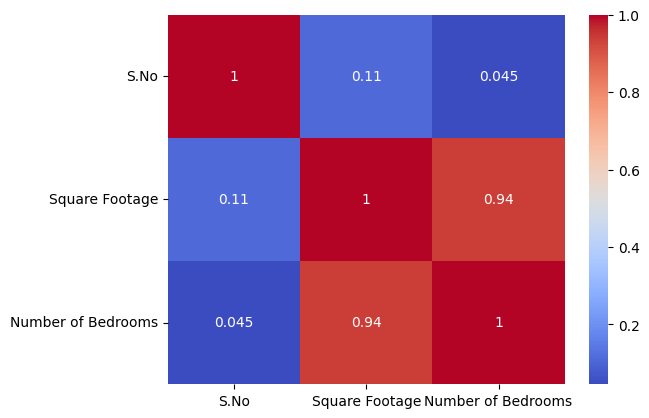

In [ ]:

numeric_df = HouseDF.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
X=HouseDF[["Square Footage","Number of Bedrooms"]]
Y=HouseDF['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=101)

In [ ]:
X_train

,Square Footage,Number of Bedrooms
37,1950,3
43,2100,4
26,2250,4
10,2300,4
30,2500,5
32,2350,5
35,2050,3
2,1800,3
27,2150,4
48,1850,3


In [ ]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression



In [ ]:
# Convert Y_train to numeric if it's not already
if Y_train.dtype == object:  # Check if it's of object type (likely strings)
    Y_train = pd.to_numeric(Y_train.str.replace(',', ''), errors='coerce')

# Convert all columns in X_train to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Square Footage,325.786615
Number of Bedrooms,87043.148509


In [ ]:
predictions=lm.predict(X_test)
predictions


array([493650.19985651, 477360.86911961, 863208.46571692, 461071.5383827 ,
       678429.33278672, 629561.340576  , 509939.53059342, 461071.5383827 ,
       308871.06692631, 645850.6713129 , 477360.86911961, 662140.00204981,
       629561.340576  , 694718.66352362, 711007.99426053, 325160.39766322,
       509939.53059342, 846919.13498001, 662140.00204981, 292581.7361894 ])

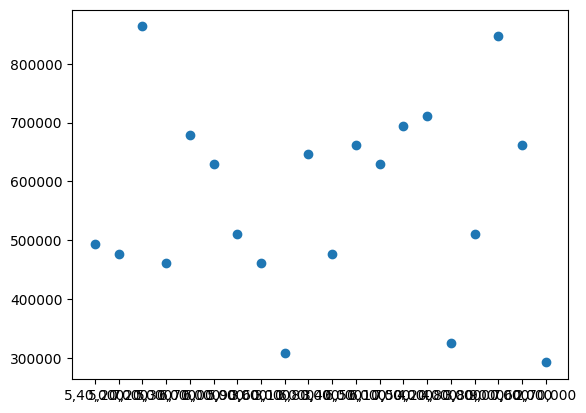

In [ ]:
plt.scatter(Y_test,predictions)